In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Creating Dataset

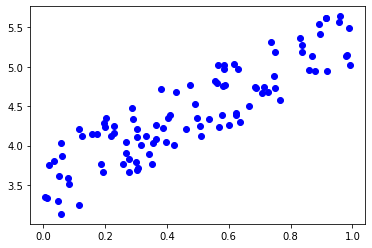

In [10]:
X = np.random.rand(100, 1)            # features
y = 3 + 2*X + np.random.rand(100, 1)  # labels
plt.plot(X, y, 'bo')

# Using SKLearn's Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [12]:
lin_reg.intercept_, lin_reg.coef_

(array([3.52778993]), array([[1.87509851]]))

In [13]:
X_new = [[2], [3]]
lin_reg.predict(X_new)

array([[7.27798696],
       [9.15308548]])

# Using Normal Equation
$$\theta = \big(X^TX\big)^{-1}X^Ty$$

In [14]:
X_biased = np.c_[np.ones(100), X]
print(X_biased[:5], "...")

[[1.         0.63073638]
 [1.         0.58037068]
 [1.         0.08181266]
 [1.         0.27586281]
 [1.         0.30322075]] ...


In [15]:
theta = np.linalg.inv(X_biased.T.dot(X_biased)).dot(X_biased.T.dot(y))
theta

array([[3.52778993],
       [1.87509851]])

In [17]:
X_new = [[0], [3]]
X_new_biased = np.c_[np.ones(2), X_new]
y_new = X_new_biased.dot(theta)
y_new

array([[3.52778993],
       [9.15308548]])

# Drawing our Hypothesis Function

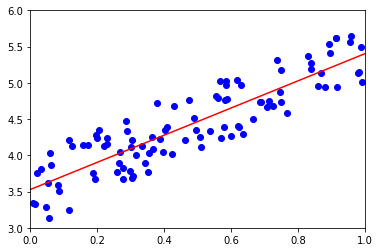

In [25]:
plt.plot(X, y, 'bo')
plt.plot(X_new, y_new, 'r-')
plt.axis([0,1,3,6])
plt.show()